# 1. 모듈 불러오기

In [20]:
import os
import pandas as pd

import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib

plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import itertools
from pmdarima.arima import auto_arima

In [2]:
data = pd.read_csv('https://github.com/algok2/Datasets/blob/main/AirPassengers.csv?raw=true')

In [3]:
data.set_index('Month', inplace=True)

In [4]:
data['Passengers']

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: Passengers, Length: 144, dtype: int64

<AxesSubplot:xlabel='Month'>

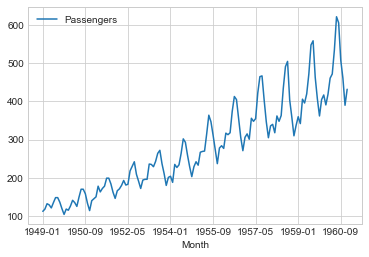

In [5]:
data.plot()

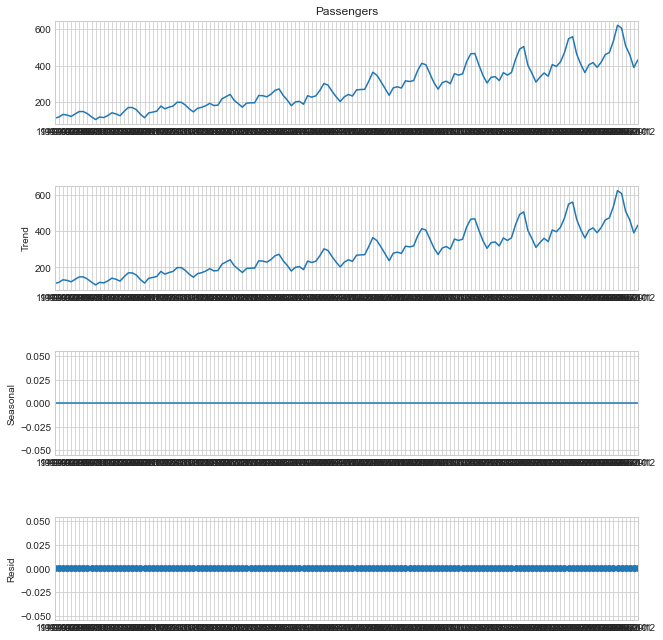

In [6]:
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive', period=1)

fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

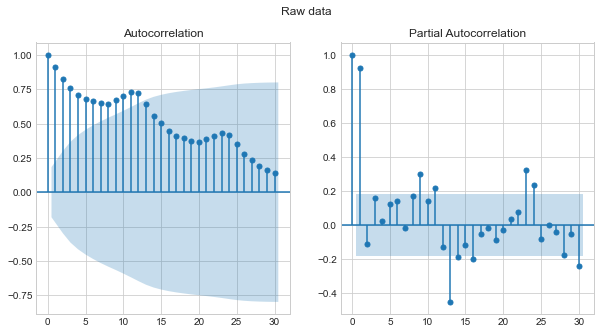

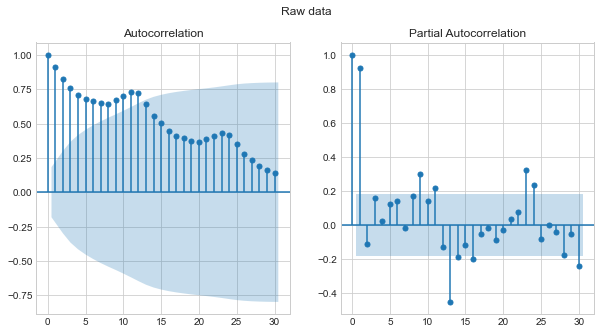

In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Raw data')

sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1])

In [8]:
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['Passengers'].diff()
diff_train_data = diff_train_data.dropna()

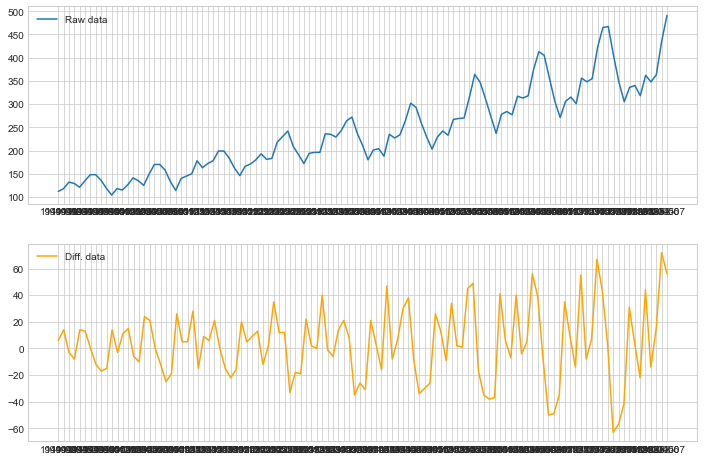

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['Passengers'])
plt.legend(['Raw data'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Diff. data'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


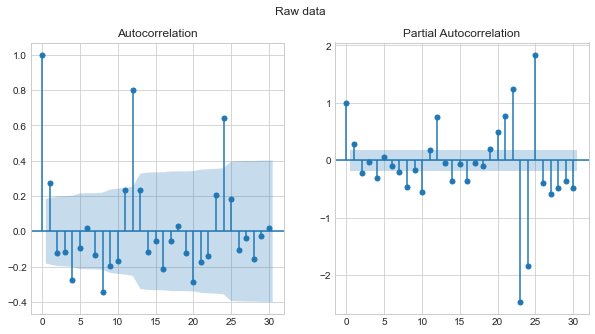

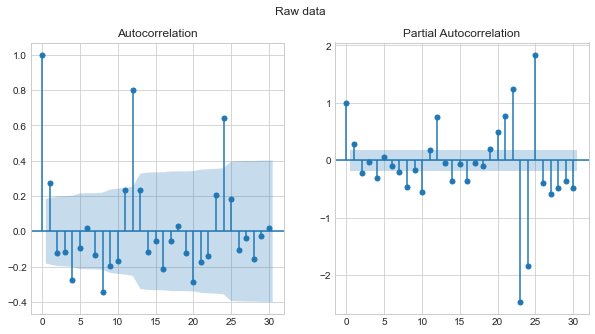

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Raw data')

sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1])

In [11]:
model  = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -531.720
Method:                       css-mle   S.D. of innovations             25.659
Date:                Mon, 07 Mar 2022   AIC                           1069.440
Time:                        23:30:43   BIC                           1077.649
Sample:                             1   HQIC                          1072.771
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5123      3.329      1.055      0.291      -3.012      10.037
ar.L1.D.y      0.2803      0.091      3.077      0.002       0.102       0.459
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5681           +0.0000j            3.5681            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
# Parameter search
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq:
    model = ARIMA(train_data.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic, 2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA: (0, 1, 0) >> AIC : 1076.52
ARIMA: (0, 1, 1) >> AIC : 1064.62
ARIMA: (0, 1, 2) >> AIC : 1061.08
ARIMA: (1, 1, 0) >> AIC : 1069.44
ARIMA: (1, 1, 1) >> AIC : 1058.83
ARIMA: (1, 1, 2) >> AIC : 1046.05
ARIMA: (2, 1, 0) >> AIC : 1066.2
ARIMA: (2, 1, 1) >> AIC : 1045.66
ARIMA: (2, 1, 2) >> AIC : 1047.19


In [13]:
#Search optimal parameters
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 1), 1045.66)]

In [14]:
model_opt = ARIMA(train_data.values, order=optimal[0][0])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -517.830
Method:                       css-mle   S.D. of innovations             22.316
Date:                Mon, 07 Mar 2022   AIC                           1045.660
Time:                        23:30:44   BIC                           1059.341
Sample:                             1   HQIC                          1051.212
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5600      0.162     15.754      0.000       2.241       2.878
ar.L1.D.y      1.0890      0.085     12.816      0.000       0.922       1.256
ar.L2.D.y     -0.4730      0.086     -5.528      0.000      -0.641      -0.305
ma.L1.D.y     -1.0000      0.040    -25.219      0.000      -1.078      -0.922
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1512           -0.8882j            1.4540           -0.1046
AR.2            1.1512           +0.8882j            1.4540            0.1046
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

### 3.5.1 use Model to forecast - ARIMA

In [15]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predicted_ub = prediction[2][:, 0]
predicted_lb = prediction[2][:, 1]
predicted_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

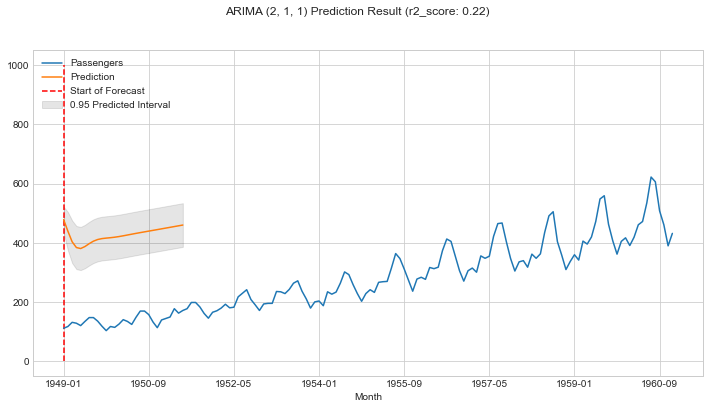

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
data.plot(ax=ax);
ax.vlines(predicted_index[0], 0, 1000, linestyle='--', color='r', label='Start of Forecast');
ax.plot(predicted_index, predicted_value, label='Prediction')
ax.fill_between(predicted_index, predicted_lb, predicted_ub, color = 'k', alpha= 0.1, label='0.95 Predicted Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Result (r2_score: {round(r2, 2)})')
plt.show()

# 3.4.3 Diagnosis Check - auto_arima

In [22]:
# Prameter search 

auto_arima_model = auto_arima(train_data, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, seasonal = True, 
                              d = 1, D = 1, max_P = 3, max_Q = 3, trace=True, error_action='ignore', 
                              suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=756.988, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=758.826, Time=0.14 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=758.186, Time=0.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=756.959, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=758.922, Time=0.06 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=754.685, Time=0.81 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=758.869, Time=0.07 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=760.726, Time=0.27 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=756.686, Time=1.00 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=759.643, Time=0.17 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=1.46 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=756.688, Time=1.25 sec
 ARIMA(0,1,1)(0,1,0)[1

In [23]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -370.278
Date:                                    Mon, 07 Mar 2022   AIC                            752.557
Time:                                            23:43:20   BIC                            768.307
Sample:                                                 0   HQIC                           758.934
                                                    - 115                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2218      0.093     -2.388      0.017      -0.404      -0.040
ar.S.L12       0.9288      0.275      3.374      0.001       0.389       1.468
ma.S.L12      -1.2065      0.448     -2.692      0.007      -2.085      -0.328
ma.S.L24       0.2771      0.174      1.596      0.111      -0.063       0.618
ma.S.L36       0.1251      0.164      0.765      0.444      -0.195       0.446
sigma2        75.0386     19.073      3.934      0.000      37.656     112.421
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.91   Prob(JB):                         0.29
Heteroskedasticity (H):               1.05   Skew:                             0.37
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 주가 예측 실습

In [44]:
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    code = code.strip()
    return code

In [45]:
url = 'https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'

In [46]:
code_data = pd.read_html(url, header=0)[0]
code_data.head(10)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DL,210,기타 금융업,지주회사,1976-02-02,12월,전병욱,http://www.dlholdings.co.kr,서울특별시
1,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
5,HDC랩스,39570,전기 및 통신 공사업,"기계설비공사, 스마트홈, 지능형 빌딩, SOC, 인테리어, 조경, 시설관리",2015-09-24,12월,김성은,http://hdc-labs.com,경기도
6,HMM,11200,해상 운송업,"정기,부정기,전용선,콘테이너선,자동차선,LNG선 해운",1995-10-05,12월,배재훈,http://www.hmm21.com,서울특별시
7,KEC,92220,반도체 제조업,반도체 제조,2006-10-16,12월,박남규 김학남,http://www.kec.co.kr,서울특별시
8,KG동부제철,16380,1차 철강 제조업,"철강재(냉연강판,아연도강판,칼라강판,석도강판,선재류,강관,형강,봉강),비철금속 제조,도매",1986-02-03,12월,박성희,http://www.kgdongbusteel.co.kr,서울특별시
9,KG케미칼,1390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,"곽정현, 김재익",http://www.kgchem.co.kr,울산광역시


In [47]:
code_data = code_data[['회사명', '종목코드']]
code_data = code_data.rename(columns={'회사명':'name', '종목코드':'code'})
code_data.code = code_data.code.map('{:06d}'.format)

In [68]:
stock_code = get_code(code_data, '삼성전자')
stock_code = stock_code + '.KS'

stock_data = pdr.get_data_yahoo(stock_code)
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-09,40300.0,40020.0,40200.0,40200.0,14372250.0,34885.433594
2017-03-10,40420.0,39860.0,39960.0,40180.0,10227800.0,34868.082031
2017-03-13,40980.0,40040.0,40040.0,40600.0,7424100.0,35232.566406
2017-03-14,41540.0,40500.0,40620.0,41360.0,11325050.0,35892.089844
2017-03-15,41440.0,40800.0,40800.0,41400.0,9587850.0,35926.792969
...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,0.0,71900.000000
2022-03-02,72400.0,71500.0,72300.0,71700.0,12481430.0,71700.000000
2022-03-03,73100.0,72200.0,72300.0,72900.0,13232638.0,72900.000000


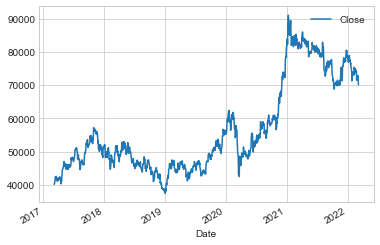

In [69]:
stock_data = stock_data[['Close']]
fig = stock_data.plot()

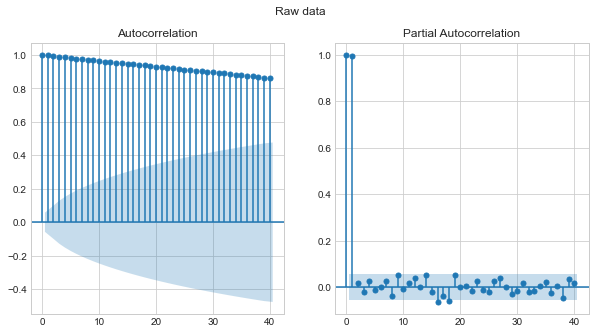

In [70]:
stock_data_train, stock_data_test = train_test_split(stock_data, test_size=0.05, shuffle=False)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw data')
sm.graphics.tsa.plot_acf(stock_data_train.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(stock_data_train.values.squeeze(), lags=40, ax=ax[1]);

In [71]:
diff_stock_data_train = stock_data_train.copy()
diff_stock_data_train = diff_stock_data_train['Close'].diff()
diff_stock_data_train = diff_stock_data_train.dropna()

# Differenced data plot

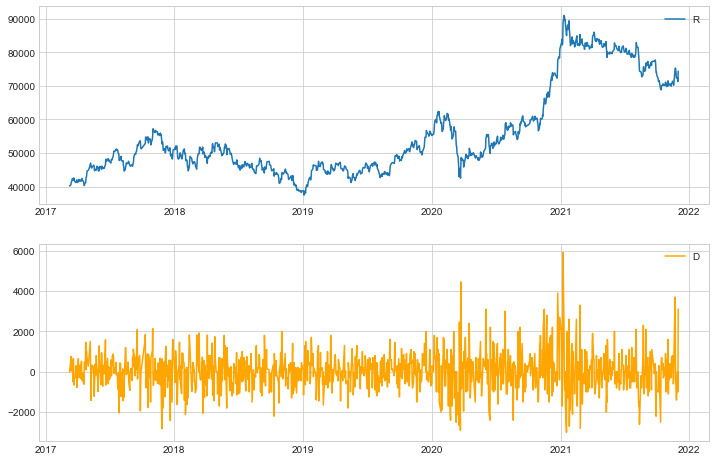

In [72]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(stock_data_train['Close'])
plt.legend('Raw data')
plt.subplot(212)
plt.plot(diff_stock_data_train, 'orange')
plt.legend('Diff. data')
plt.show()

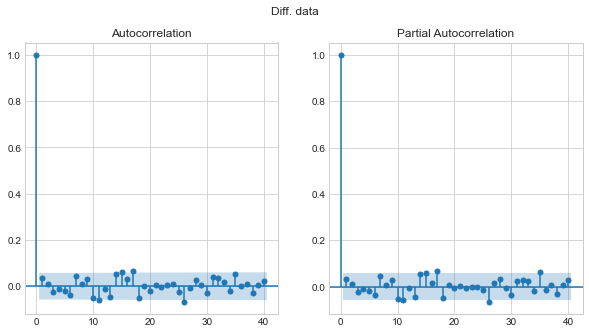

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Diff. data')
sm.graphics.tsa.plot_acf(diff_stock_data_train.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_stock_data_train.values.squeeze(), lags=40, ax=ax[1]);

In [74]:
# Prameter search 

auto_arima_model = auto_arima(stock_data_train, start_p = 1, start_q = 1, 
                              max_p = 3, max_q = 3, m = 12, seasonal = False, 
                              d = 1, 
                              max_P = 3, max_Q = 3, 
                              trace=True, error_action='ignore', 
                              suppress_warnings=True, 
                              stepwise=False)

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19139.702, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19140.772, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19142.489, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=19144.419, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19140.741, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19142.660, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19144.482, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=19146.386, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=19142.489, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19144.469, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19146.355, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=19148.415, Time=0.62 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=19144.376, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19146.381, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19148.384, Time=0.17

In [75]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1161
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9567.851
Date:                Tue, 08 Mar 2022   AIC                          19139.702
Time:                        00:37:02   BIC                          19149.814
Sample:                             0   HQIC                         19143.518
                               - 1161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.4828     27.684      1.065      0.287     -24.777      83.743
sigma2      8.546e+05   2.35e+04     36.390      0.000    8.09e+05    9.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):               401.13
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
prediction = auto_arima_model.predict(len(stock_data_test), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:, 0]
predicted_lb = prediction[1][:, 1]
predicted_index = list(stock_data_test.index)
predicted_index[0]

Timestamp('2021-12-02 00:00:00')

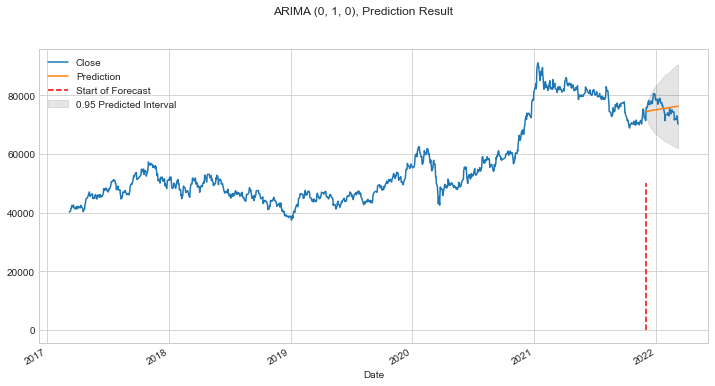

In [77]:
fig, ax = plt.subplots(figsize=(12, 6))
stock_data.plot(ax=ax);
ax.vlines('2021-12-02', 0, 50000, linestyle='--', color='r', label='Start of Forecast');
ax.plot(predicted_index, predicted_value, label='Prediction')
ax.fill_between(predicted_index, predicted_lb, predicted_ub, color = 'k', alpha= 0.1, label='0.95 Predicted Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order}, Prediction Result')
plt.show()

In [79]:
predicted_value
predicted_index

[Timestamp('2021-12-02 00:00:00'),
 Timestamp('2021-12-03 00:00:00'),
 Timestamp('2021-12-06 00:00:00'),
 Timestamp('2021-12-07 00:00:00'),
 Timestamp('2021-12-08 00:00:00'),
 Timestamp('2021-12-09 00:00:00'),
 Timestamp('2021-12-10 00:00:00'),
 Timestamp('2021-12-13 00:00:00'),
 Timestamp('2021-12-14 00:00:00'),
 Timestamp('2021-12-15 00:00:00'),
 Timestamp('2021-12-16 00:00:00'),
 Timestamp('2021-12-17 00:00:00'),
 Timestamp('2021-12-20 00:00:00'),
 Timestamp('2021-12-21 00:00:00'),
 Timestamp('2021-12-22 00:00:00'),
 Timestamp('2021-12-23 00:00:00'),
 Timestamp('2021-12-24 00:00:00'),
 Timestamp('2021-12-27 00:00:00'),
 Timestamp('2021-12-28 00:00:00'),
 Timestamp('2021-12-29 00:00:00'),
 Timestamp('2021-12-30 00:00:00'),
 Timestamp('2022-01-04 00:00:00'),
 Timestamp('2022-01-05 00:00:00'),
 Timestamp('2022-01-06 00:00:00'),
 Timestamp('2022-01-07 00:00:00'),
 Timestamp('2022-01-10 00:00:00'),
 Timestamp('2022-01-11 00:00:00'),
 Timestamp('2022-01-12 00:00:00'),
 Timestamp('2022-01-